## 1.	Dictionary Woes

A proprietary API for querying a remote data service returns data rows in key/value dictionaries, but the key name case is unreliable.  They are always well formed in regard to using underscore for spaces, but the case tends to be unreliable.  For example: CuStoMer_NAMe, CUSTOMER_name, Customer_Name, customer_name.  We need to standardize the dictionary key case on all records before inserting the dictionary into mongodb.  Define and implement a python3 function named “fixup_case” that takes a dictionary as an argument and returns a dictionary with its key names standardized.  Explain the method of standardization you picked and why.


In [121]:
list = []
id_list = [0]
def fixup_case(rows):
    for k, v in rows.items():
        list.append((k.lower()+"_{}".format(max(id_list)+1),v))
        id_list.append(max(id_list)+1)
    return dict(list)

In [122]:
rows = {"CuStoMer_NAMe":"Enes","CuStomer_NAMe":"Dilara"}

In [123]:
fixup_case(rows)

{'customer_name_1': 'Enes', 'customer_name_2': 'Dilara'}

In [124]:
new_rows = {"customer_NAME":"George","custoMER_NAme":"Micheal"}

In [125]:
fixup_case(new_rows)

{'customer_name_1': 'Enes',
 'customer_name_2': 'Dilara',
 'customer_name_3': 'George',
 'customer_name_4': 'Micheal'}

### Solution Explanation:

I have chosen .lower() method which is Python built in function and that way code will be environment undependant. I also added "id_list" varible because otherwise we may face lack of information when more than 1 keys are same in the same rows of data. id_lists are storing inside of the list and if we store this information into database we can keep track of our current id and increment it when we have new data. 

## 2.	Argument Salad
Python3 functions can take a mix of positional and named arguments.  Define a function that takes one required argument and two optional arguments with default values.


In [191]:
def cosine_func_salad(alpha, b=10, c=20):
    alpha = math.radians(alpha)
    a = math.sqrt((b**2 + c**2) - (2*b*c*math.cos(alpha)))
    return a

In [194]:
import math
cosine_func_salad(10,10,20)

10.29936399954467

In [201]:
cosine_func_salad(30,4,5)

2.521702569420599

### Solution Explanation:
Here I defined cosine function that calculates third edge of the triangle for given values of other 2 edges and degree value in between. Alpha value here is positional argument which is a required value, while edge values (b, c) are named arguments which are optional.

## 3.	Type Troubles
Implement a python3 function that accepts one argument named “pet”, but acts differently based on the type of object passed in.  If the function is passed a Dog object, call the bark() method on the object.  If the function is passed a Cat object, call the meow() method on the object.  If neither a Dog or Cat is passed, raise an exception.


In [252]:
class Methods_Cat_Dog():
    
    def bark():
        print("Bark")
    def meow():
        print("Meow")

In [254]:
class Cat_or_Dog(Methods_Cat_Dog):
    def __init__(self, pet):
        self.pet = pet
    
        if self.pet == "Dog":
            Cat_or_Dog.bark()
        elif self.pet == "Cat":
            Cat_or_Dog.meow()
        else:
            raise Exception("Wrong")


In [255]:
Cat_or_Dog("Dog")

Bark


In [256]:
Cat_or_Dog("Cat")

Meow


In [257]:
Cat_or_Dog("Bird")

Exception: Wrong

### Solution Explanation
When I read the question it seems to me good example of inheritance for object. Simply I defined a method object which includes bark() and meow() methods and I defined Cat_or_Dog object to accept "pet" argument and according to type of the pet, related methods called which inherited before.

## 4.	Lists of Lists
Implement a python3 code snippet that iterates a list of lists.  For each inner list encountered, print a header that says “List X” where X is the number of the inner list (i.e. “List 1”… “List 5”).  After the “List X” header, print the sum of all items in the inner list.  Do this for all inner lists contained in the outer list. 


In [262]:
for i in list:
    print("List {}".format(list.index(i)))
    print(sum(i))

List 0
3
List 1
12
List 2
6
List 3
18


### Solution Explanation
I used format print method to show number of list item using positional argument and sum method to calculate sum of all items inside of the inner lists.

## 5.	Mutually Exclusive Access
Write a python3 function called “increment_count” that takes one argument names “by”.  Whatever value is passed in via the “by” argument should be added to a global variable “the_count”.  Before exiting, a global variable named “last_by” should be updated with with the value that was passed in via the “by” argument.  This function should be THREAD SAFE and utilize a global Lock variable defined outside the function to isolate the update of both “the_count” and “last_by” in the same exclusive access block.  Extra credit for utilizing python3 context management protocol, which is supported by Locks in this scenario.


In [263]:
import threading
the_count = 0
last_by = 0
lock = threading.Lock()
def increment_count(by):
    global the_count
    global last_by
    with lock:
        the_count = the_count + by
    with lock:
        last_by = by

In [264]:
increment_count(4)

In [265]:
the_count

4

In [266]:
last_by

4

In [267]:
increment_count(21)

In [268]:
the_count

25

In [269]:
last_by

21

### Solution Explanation
Here I used lock method from threading library which is used to protect counting operations and that way we avoid processing same counting operation in more than 1 thread at the same time.

## 6.	Animals
Write a python3 program that defines an Animal base class and three derived classes that inherit from Animal: Cat, Dog, and Fish classes.  
The Animal base class should take the animal’s name (such as “rover”) as an argument to its constructor.  The Animal class should have a method “whoami” that returns the name value to the caller.  The animal class should have an implementation of the “speak” method that prints out “The animal refuses to speak”—this will be a default method incase no derived class implements it.
Three derived classes (Cat, Dog, and Fish) should take name as their constructor argument and in turn pass it to the Animal base class constructor.  Extra credit for utilizing python 3.1’s new enhanced super() function to avoid hard coding the base class name.  The Cat class should implement a “speak” method that prints “Meow!”.  The Dog class should implement a “speak” method that prints “Woof!”.  The Fish class should not implement a “speak” method, as fish do not speak.
Once the base class and three derived classes are written, create a mainline program/script (in the same file) that creates an empty list named “animals” and then appends a Dog named “Rover”, a Cat named “Hank”, and a Fish named “Fred” to the list.  After the list is populated with the three derived Animal instances, iterate the list and for each animal, print the animal’s name and then call it’s speak method.  The output should appear as follows.
This animal's name is Rover
Woof!
This animal's name is Hank
Meow!
This animal's name is Fred
The animal refuses to speak

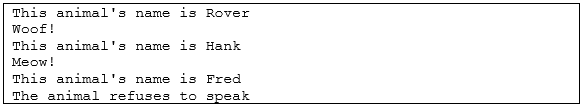

In [36]:
class Animal():
    def __init__(self, name):
        self.name = name
    
    def whoami(self):
        print("This animal's name is {}".format(self.name))
        
    def speak(self):
        print("The animal refuses to speak")

class Dog(Animal):
    def __init__(self, name):
        super().__init__(name)
    
    def speak(self):
        print("Woof!")

class Cat(Animal):
    def __init__(self, name):
        super().__init__(name)
    
    def speak(self):
        print("Meow!")

class Fish(Animal):
    def __init__(self, name):
        super().__init__(name)
        
def Animal_list(Dog_n,Cat_n,Fish_n):
    animals = []
    list0 = Dog("{}".format(Dog_n))
    list1 = Cat("{}".format(Cat_n))
    list2 = Fish("{}".format(Fish_n))
    animals.append(list0)
    animals.append(list1)
    animals.append(list2)
    for animal in animals:
        animal.whoami()
        animal.speak()
Animal_list("Rover","Hank","Fred")

This animal's name is Rover
Woof!
This animal's name is Hank
Meow!
This animal's name is Fred
The animal refuses to speak


## 7.	Threads and Processes
Without using 3rd party libraries (only things included in python3+), create a python program that starts 4 additional processes, each of which start 10 threads.  Each thread waits for strings to be sent via a thread and processor safe Queue.  When any thread receives a string, it prints out its thread id as well as the string.  Each thread monitors a thread and processor safe Event and when the event is set, each thread should print an exit message and terminate, but only if there is no more data to be read on the Queue. The mainline of the program (which spawned the processes) should send 100 different strings to the Queue, causing strings to be available for receiving by the 40 threads.  When the mainline is done, set the exit Event to trigger the 40 threads to gracefully exit.
Hint: Compare multiprocess and threading modules and decide which to use when utilizing processes.  One can be used in both situations, the other cannot.


In [ ]:
import threading 
  
def print_cube(num): 
    """ 
    function to print cube of given num 
    """
    print("Cube: {}".format(num * num * num)) 
  
def print_square(num): 
    """ 
    function to print square of given num 
    """
    print("Square: {}".format(num * num)) 
  
if __name__ == "__main__": 
    # creating thread 
    t1 = threading.Thread(target=print_square, args=(10,)) 
    t2 = threading.Thread(target=print_cube, args=(10,)) 
  
    # starting thread 1 
    t1.start() 
    # starting thread 2 
    t2.start() 
  
    # wait until thread 1 is completely executed 
    t1.join() 
    # wait until thread 2 is completely executed 
    t2.join() 
  
    # both threads completely executed 
    print("Done!") 
